<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

**Ναυσικά Αμπατζή - 03117198**

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

# εξασφάλιση ότι το δίκτυο θα είναι συνδεδεμένο
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

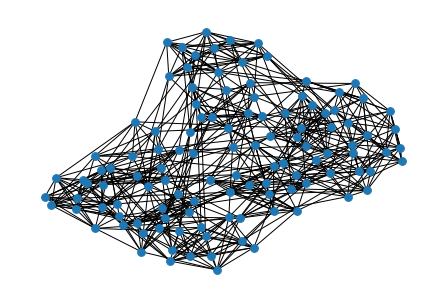

In [5]:
#football network
football=nx.read_gml("football.gml")
#visualize football
nx.draw(football, node_size=60)

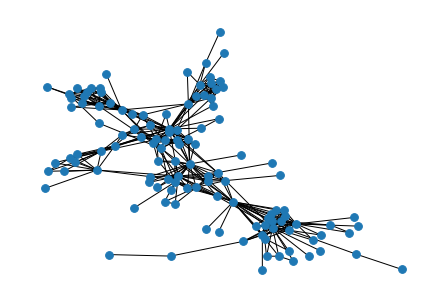

In [6]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
# visualize got
nx.draw(got, node_size=60)

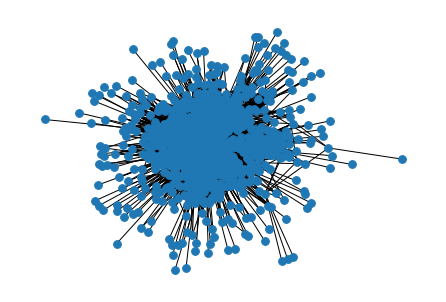

In [7]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
# remove self loops using remove_edges_from
eu.remove_edges_from(nx.selfloop_edges(eu))
# biggest connected component
largest_eu = max(nx.connected_components(eu), key=len)
email =  eu.subgraph(largest_eu)
# visualize 
nx.draw(email, node_size=60)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

Mean node degree:
 
REG: 4.0
RGER: 7.5
RGG: 14.0
SF: 7.6
SW: 4.0
Football: 10.660869565217391
Got: 6.65546218487395
email-Eu-core: 32.5841784989858


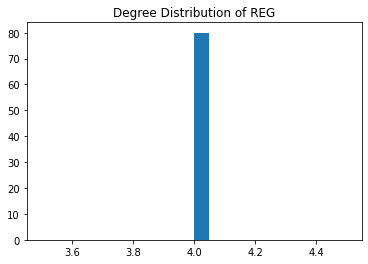

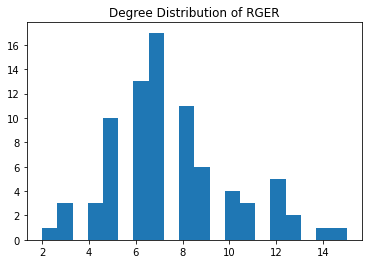

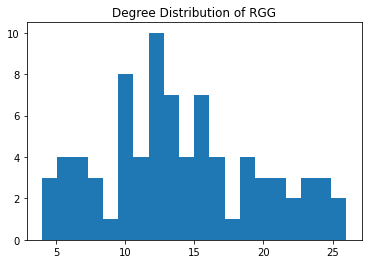

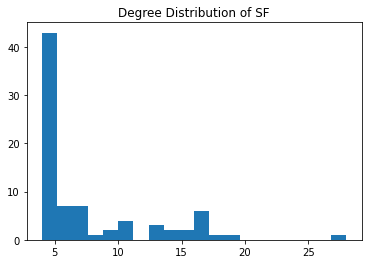

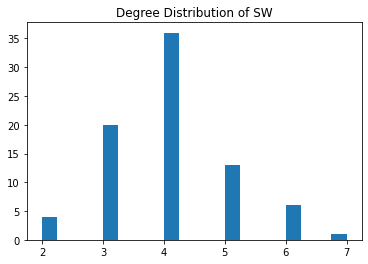

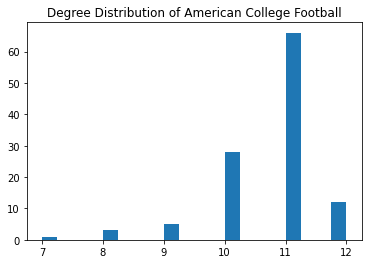

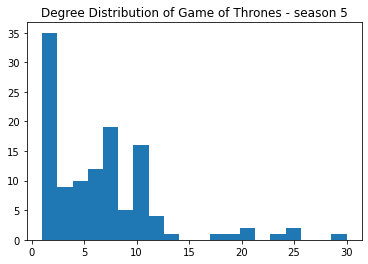

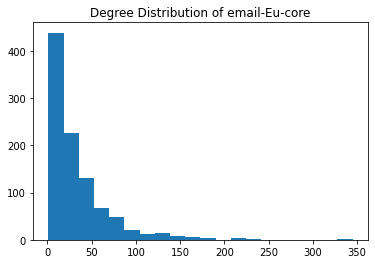

In [ ]:
def find_degree(G):
    return dict(G.degree())

# compute node degrees
REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(football)
got_degree = find_degree(got)
eu_degree = find_degree(email)

# mean node degree
print("Mean node degree:")
print(" ")
print('REG:',np.mean(list(REG_degree.values())))
print('RGER:',np.mean(list(RGER_degree.values())))
print('RGG:',np.mean(list(RGG_degree.values())))
print('SF:',np.mean(list(SF_degree.values())))
print('SW:',np.mean(list(SW_degree.values())))
print('Football:',np.mean(list(football_degree.values())))
print('Got:',np.mean(list(got_degree.values())))
print('email-Eu-core:',np.mean(list(eu_degree.values())))

# plot histograms
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,bins = 20)
    plt.show()

plt.title("Degree Distribution of REG")
plot_degree_dist(REG)
plt.title("Degree Distribution of RGER")
plot_degree_dist(RGER)
plt.title("Degree Distribution of RGG")
plot_degree_dist(RGG)
plt.title("Degree Distribution of SF")
plot_degree_dist(SF)
plt.title("Degree Distribution of SW")
plot_degree_dist(SW)
plt.title("Degree Distribution of American College Football")
plot_degree_dist(football)
plt.title("Degree Distribution of Game of Thrones - season 5")
plot_degree_dist(got)
plt.title("Degree Distribution of email-Eu-core")
plot_degree_dist(email)


**Σχολιασμός**

Συγκίνοντας τις μέσες τιμές των πραγματικών δικτύων και των συνθετικών, παρατηρούμε ότι το football είναι ανάμεσα στο SF και το RGG, το got είναι σχετικά κοντά στα SF και RGER, ενώ το email eu απέχει πολύ απ'όλα(μέση τιμή 32). Κάτι τέτοιο ήταν αναμενόμενο φυσικά, αφού πρόκειται για βάση δεδομένων από emails. Σχετικά με την αναπαράσταση του βαθμού κόμβου, παρατηρούμε μία σχετική ομοιότητα ανάμεσο το email eu και στο SF. Αυτό συμβαίνει καθώς το email eu δίκτυο ακολουθεί power-law κατανομή, η οποία προκύπτει από το γεγονός ότι ένα μέλος που λαμβάνει πολλά emails πρέπει να απαντάει και περισσότερο και φυσικά τα emails ανταλλάσσονται πιο συνχνά μεταξύ γνωστών.

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

Mean clustering coefficient:
 
REG: 0.5
RGER: 0.10780871905871905
RGG: 0.688913093972927
SF: 0.15363123521502003
SW: 0.1943452380952381
Football: 0.40321601104209803
Got: 0.5744036387164707
email-Eu-core: 0.4070504475195386


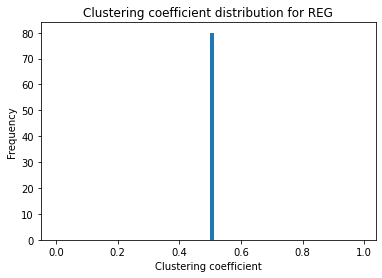

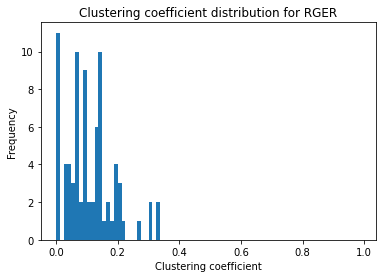

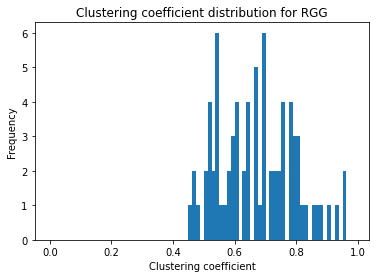

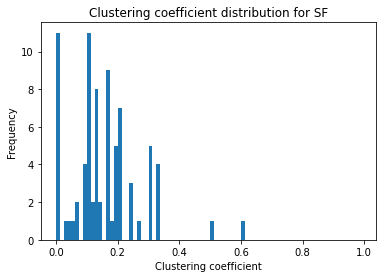

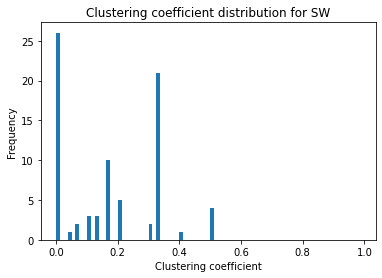

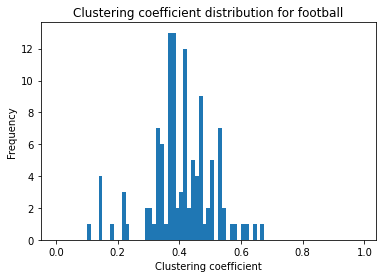

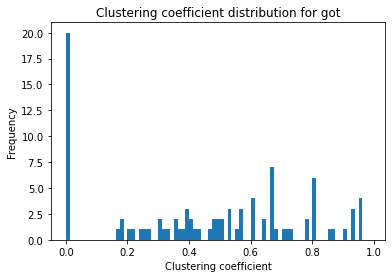

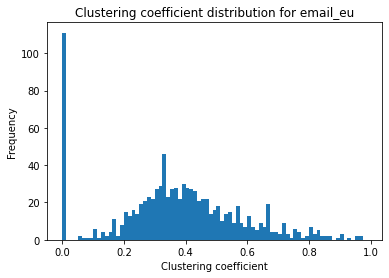

In [ ]:
def cc(G,topology):
    return(nx.clustering(G))

clust_coef = {}
clust_coef["REG"] = cc(REG,"REG")
clust_coef["RGER"] = cc(RGER,"RG(ER)")
clust_coef["RGG"] = cc(RGG,"RGG)")
clust_coef["SF"] = cc(SF,"SF(BA)")
clust_coef["SW"] = cc(SW,"SW(BS)")
clust_coef["football"] = cc(football,"Footbal")
clust_coef["got"] = cc(got,"got")
clust_coef["email_eu"] = cc(email,"email EU")

# mean clustering coefficient
print("Mean clustering coefficient:")
print(" ")
print('REG:',np.mean(list(cc(REG,"REG").values())))
print('RGER:',np.mean(list(clust_coef["RGER"].values())))
print('RGG:',np.mean(list(clust_coef["RGG"].values())))
print('SF:',np.mean(list(clust_coef["SF"].values())))
print('SW:',np.mean(list(clust_coef["SW"].values())))
print('Football:',np.mean(list(clust_coef["football"].values())))
print('Got:',np.mean(list(clust_coef["got"] .values())))
print('email-Eu-core:',np.mean(list(clust_coef["email_eu"] .values())))

# plot histograms
for topology in clust_coef.keys():
  X = np.sort(np.array(list(clust_coef[topology].values())))
  Y = np.array(range(n))/float(n)
  plt.figure() 
  plt.title("Clustering coefficient distribution for "+topology)
  plt.xlabel("Clustering coefficient")
  plt.ylabel("Frequency")
  plt.hist(X, Y)

**Σχολιασμός** <br>
 Όσον αφορά το clustering coefficient, η τιμή της μέσης τιμής του football είναι πιο κοντά στον REG γράφο, παρόλο που οι κατανομές τους δεν μοιάζουν. Το ίδιο ισχύει και για το email EU. Το got όσον αφορά τη μέση τιμή είναι ανάμεσα στον REG και τον RGG και φυσικά η κατανομή του είναι πιο κοντά στου RGG.

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

Closeness centrality:
 
REG: 0.09634146341463413
RGER: 0.42475897842852933
RGG: 0.36365115947647253
SF: 0.4386021576757619
SW: 0.2791959454639716
Football: 0.39931907825186225
Got: 0.31905170483140755
email-Eu-core: 0.39446404120869627


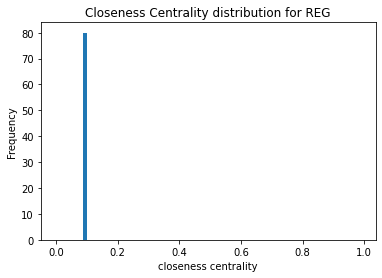

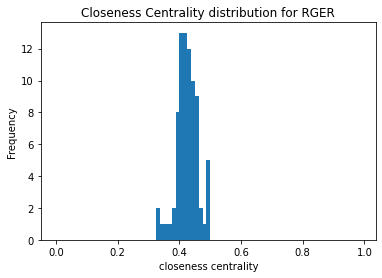

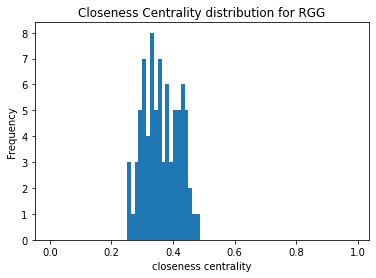

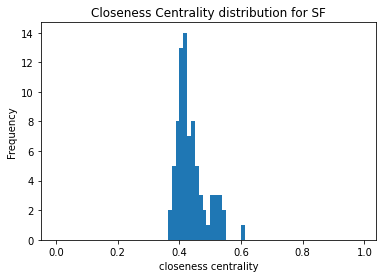

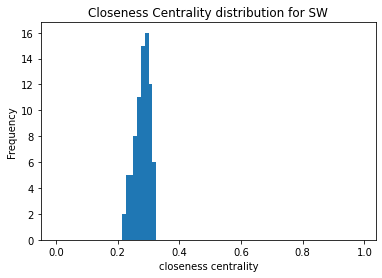

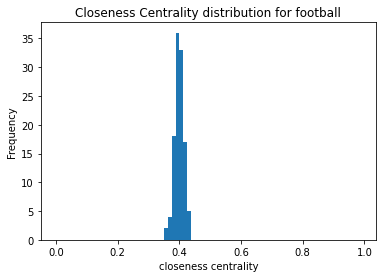

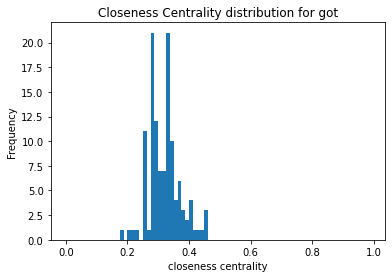

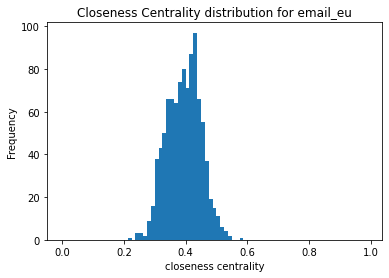

In [ ]:
def find_closeness(G,topology):
    return nx.closeness_centrality(G)

clos_centr = {}
clos_centr["REG"] = find_closeness(REG,"REG")
clos_centr["RGER"] = find_closeness(RGER,"RG(ER)")
clos_centr["RGG"] = find_closeness(RGG,"RGG)")
clos_centr["SF"] = find_closeness(SF,"SF(BA)")
clos_centr["SW"] = find_closeness(SW,"SW(BS)")
clos_centr["football"] = find_closeness(football,"Footbal")
clos_centr["got"] = find_closeness(got,"got")
clos_centr["email_eu"] = find_closeness(email,"email EU")

# mean closeness centrality
print("Closeness centrality:")
print(" ")
print('REG:',np.mean(list(clos_centr["REG"].values())))
print('RGER:',np.mean(list(clos_centr["RGER"].values())))
print('RGG:',np.mean(list(clos_centr["RGG"].values())))
print('SF:',np.mean(list(clos_centr["SF"].values())))
print('SW:',np.mean(list(clos_centr["SW"].values())))
print('Football:',np.mean(list(clos_centr["football"].values())))
print('Got:',np.mean(list(clos_centr["got"] .values())))
print('email-Eu-core:',np.mean(list(clos_centr["email_eu"] .values())))

# plot histograms
for topology in clos_centr.keys():
  X = np.sort(np.array(list(clos_centr[topology].values())))
  Y = np.array(range(n))/float(n)
  plt.figure() 
  plt.title("Closeness Centrality distribution for "+topology)
  plt.xlabel("closeness centrality")
  plt.ylabel("Frequency")
  plt.hist(X, Y)

**Σχολιασμός** <br>
Όσον αφορά το closeness centrality, τα δίκτυα footbal και email eu έχουν παρόμοια μέση τιμή του closeness centrality με την RGER τοπολογία, ενώ το got με το SW. Το football έχει αρκετά παρόμοια κατανομή της μετρικής αυτής με το RGER επίσης, ενώ του got μοιάζει περισσότερο με του SW. Τέλος, το email eu θα λέγαμε ότι μοίαζει κάπως καλύτερα με το RGG και το SF.

Όσον αφορά τις παραπάνω συγκρίσεις, παρατηρήσαμε ότι το clusterring coefficient δεν απέδωσε πολλές ομοιότητες. Όσον αφορά την αντιστοιχία με τους συνθετικούς γράφους:
1. Το football θα το αντιστοιχίσουμε με το RGER δίκτυο.
2. Το got θα το αντιστοιχίσουμε με το RGG δίκτυο καθώς οι παραπάνω μετρικές έχουν περισσότερες ομοιότητες σε σχέση με τα υπόλοιπα δίκτυα.
3. Το email EU θα το αντιστοιχίσουμε με το SF(ή και SW) δίκτυο, καθώς η διαδικασία ανταλλαγής emails μπορεί να παρομοιαστεί με αυτά τα δύο δίκτυα. 

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [8]:
# μετατροπή τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

football_conv, football_map = conv2int(football, 0)
got_conv, got_map = conv2int(got, 0)
email_conv, email_map = conv2int(email, 0)

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [9]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [10]:
from tqdm import tqdm
import time

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο  **Newman-Girvan**.


Ο αλγόριθμος Girvan-Newman ανιχνεύει τις κοινότητες ενός γράφου με την προοδευτική αφαίρεση των ακμών από το αρχικό δίκτυο. Πιο συγκεκριμένα, χρησιμοποιεί την μετρική Edge Betweenness Centrality (EBC).Η πιο κεντρική ακμή ως προς την EBC είναι η ακμή που συμμετέχει στο μεγαλύτερο ποσοστό συντομότερων
μονοπατιών. Επομένως, ο αλγόριθμος κάθε επανάληψη, υπολογίζει την EBC κάθε ακμής και αφαιρεί την ακμή με την μεγαλύτερη EBC. Τερματίζει όταν κάθε κόμβος αποτελεί μία κοινότητα.

In [ ]:
# function for modularity
# partitions up to k = 50 
import itertools    
def girvan_newman_mod(G,topology,k=50):
    res = nx.algorithms.community.centrality.girvan_newman(G)
    lim = itertools.takewhile(lambda c: len(c) <= k, res)
    modularity = -1 
    best_res = None
    temp = 0
    for i,communities in tqdm(enumerate(lim)): 
      if modularity < nx.algorithms.community.quality.modularity(G, communities):
          modularity = nx.algorithms.community.quality.modularity(G, communities)
          best_res = communities
          temp = i+2
    print(topology, "k =", temp, 'and best modularity =', modularity)
    return tuple(sorted(c) for c in best_res)
 


In [ ]:
# function for performance
# partiction_quality function returns a tuple that contains (coverage, performance)
# we convert it each time to an array and keep the second part for performance
def girvan_newman_quality(G,topology,k=50):
  res = nx.algorithms.community.centrality.girvan_newman(G)
  lim = itertools.takewhile(lambda c: len(c) <= k, res)
  quality = 0
  best_res = None
  temp = 0
  for i,communities in tqdm(enumerate(lim)): 
    x = np.array(nx.algorithms.community.quality.partition_quality(G, communities))
    if quality < x[1]:
        quality = x[1]
        best_res = communities
        temp = i+2
  print(topology, "k =", temp, 'and best performance =', quality)
  return tuple(sorted(c) for c in best_res)

In [ ]:
print('Newman-Girvan\n')
gir_reg_mod = girvan_newman_mod(REG, "REG")
gir_reg_per = girvan_newman_quality(REG, "REG")
gir_rger_mod = girvan_newman_mod(RGER,"RGER")
gir_rger_per = girvan_newman_quality(RGER, "RGER")
gir_rgg_mod = girvan_newman_mod(RGG, "RGG")
gir_rgg_per = girvan_newman_quality(RGG, "RGG")
gir_sf_mod = girvan_newman_mod(SF, "SF")
gir_sf_per = girvan_newman_quality(SF, "SF")
gir_sw_mod = girvan_newman_mod(SW, "SW")
gir_sw_per = girvan_newman_quality(SW, "SW")
gir_foot_mod = girvan_newman_mod(football_conv, "Footbal")
gir_foot_per = girvan_newman_quality(football_conv, "Footbal")
gir_got_mod = girvan_newman_mod(got_conv, "got")
gir_got_per = girvan_newman_quality(got_conv, "got")
gir_eu_mod = girvan_newman_mod(email_conv, "email EU")
ger_eu_per = girvan_newman_quality(email_conv, "email EU")

Newman-Girvan



49it [00:00, 71.39it/s]


REG k = 8 and best modularity = 0.7249999999999999


49it [00:00, 72.00it/s]


REG k = 16 and best performance = 0.9696202531645569


49it [00:04, 12.14it/s]


RGER k = 25 and best modularity = 0.2237111111111111


49it [00:03, 12.25it/s]


RGER k = 33 and best performance = 0.9221518987341772


49it [00:05,  8.80it/s]


RGG k = 5 and best modularity = 0.48454878826530606


49it [00:05,  8.85it/s]


RGG k = 26 and best performance = 0.9031645569620254


49it [00:04, 11.87it/s]


SF k = 25 and best modularity = 0.1305131146121883


49it [00:04, 11.90it/s]


SF k = 49 and best performance = 0.915506329113924


49it [00:01, 46.83it/s]


SW k = 8 and best modularity = 0.5790039062500001


49it [00:00, 49.03it/s]


SW k = 31 and best performance = 0.9686708860759494


49it [00:09,  4.93it/s]


Footbal k = 10 and best modularity = 0.5996290274077957


49it [00:09,  5.00it/s]


Footbal k = 17 and best performance = 0.9581998474446987


49it [00:03, 13.84it/s]


got k = 8 and best modularity = 0.6681205999387817


49it [00:03, 14.23it/s]


got k = 50 and best performance = 0.96425010682239


49it [14:21, 17.58s/it]


email EU k = 2 and best modularity = 0.0006218821799455388


49it [14:29, 17.74s/it]

email EU k = 50 and best performance = 0.13940548388093205


Όσον αφορά τους χρόνους υπολογισμού των βέλτιστων αποτελεσμάτων για κάθε γράφο(χρήση συνάρτησης tqdm), παρατηρούμε ότι είναι πολύ μικροί έως μηδενικοί σε όλες τις περιπτώσεις εκτός από το email EU. 

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο **Spectral Clustering**. 

Ο αλγόριθμος Spectral Clustering δέχεται ως είσοδο τον πίνακα γειτνίασης του γράφου και υπολογίζει τα ιδιοδιανύσματα και τις ιδιοτιμές του γράφου, τα οποία περιέχουν ιδιότητες σχετικά με τη διαμέριση του γράφου. Έπειτα γίνεται μετασχηματισμός των κόμβων του γράφου σε σημεία ενός μετρικού χώρου. Επιλεγονται k ιδιοδιανσματα του πίνακα L για να προσδιοριστούν οι συντεταγμένες των κόμβων σε έναν μετρικό χώρο διάστασης k. Το πρόβλημα της διαμέρισης του γράφου σε k κοινότητες ανάγεται σε πρόβλημα ομαδοποίησης n σημείων του μετρικού χώρου διάστασης k. Τέλος με τη χρήση του αλγορίθμου ομαδοποίησης (k-means) γίνεται η ανάθεση σημείων σε κοινότητες. Θα χρησιμοποιήσουμε την έτοιμη υλοποίση του Spectral Clustering από το sklearn.

In [ ]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.simplefilter("ignore", UserWarning)

def spectral_mod(G, topology,k=50):
   
    adj = nx.adjacency_matrix(G)
    modularity = -1
    temp = 0
    v = len(G)
    best_res = None
    for i in tqdm(range(2, k+1)):
        spect = SpectralClustering(i)
        spect.fit(adj)
        
        ar = np.arange(len(spect.labels_))
        communities = []
        for j in range(0, i):
            communities.append(set(ar[spect.labels_==j]))
        if modularity < nx.algorithms.community.quality.modularity(G, communities):
            modularity = nx.algorithms.community.quality.modularity(G, communities)
            temp = i
            best_res = communities
    print(topology, "k =", temp, 'best modularity =', modularity)
    if modularity!=0:
      return tuple(sorted(c) for c in best_res)
    else:
      return 0

In [ ]:
def spectral_quality(G, topology,k=50):
   
    adj = nx.adjacency_matrix(G)
    quality = 0 
    temp = 0
    v = len(G)
    best_res = None
    for i in tqdm(range(2, k+1)):
        spect = SpectralClustering(i)
        spect.fit(adj)
        ar = np.arange(len(spect.labels_))
        communities = []
        for j in range(0, i):
            communities.append(set(ar[spect.labels_==j]))
        x = np.array(nx.algorithms.community.quality.partition_quality(G, communities))
        if quality < x[1]:
            quality = x[1]
            temp = i
            best_res = communities
    print(topology, "k =", temp, 'best performance =', quality)
    if quality !=0:
      return tuple(sorted(c) for c in best_res)
    else:
       return 0

In [ ]:
print('Spectral Clustering\n')
spect_reg_mod = spectral_mod(REG, "REG")
spect_reg_per = spectral_quality(REG, "REG")
spect_rger_mod = spectral_mod(RGER,"RGER")
spect_rger_per = spectral_quality(RGER, "RGER")
spect_rgg_mod = spectral_mod(RGG, "RGG")
spect_rgg_per = spectral_quality(RGG, "RGG")
spect_sf_mod = spectral_mod(SF, "SF")
spect_sf_per = spectral_quality(SF, "SF")
spect_sw_mod = spectral_mod(SW, "SW")
spect_sw_per = spectral_quality(SW, "SW")
spect_foot_mod = spectral_mod(football_conv, "Footbal")
spect_foot_per = spectral_quality(football_conv, "Footbal")
spect_got_mod = spectral_mod(got_conv, "got")
spect_got_per = spectral_quality(got_conv, "got")
spect_eu_mod = spectral_mod(email_conv, "email EU")
spect_eu_per = spectral_quality(email_conv, "email EU")

Spectral Clustering



100%|██████████| 49/49 [00:14<00:00,  3.44it/s]


REG k = 7 best modularity = 0.725


100%|██████████| 49/49 [00:15<00:00,  3.23it/s]


REG k = 20 best performance = 0.9724683544303797


100%|██████████| 49/49 [00:15<00:00,  3.23it/s]


RGER k = 5 best modularity = 0.08940555555555556


100%|██████████| 49/49 [00:15<00:00,  3.15it/s]


RGER k = 50 best performance = 0.8278481012658228


100%|██████████| 49/49 [00:15<00:00,  3.21it/s]


RGG k = 4 best modularity = 0.49854432397959186


100%|██████████| 49/49 [00:15<00:00,  3.23it/s]


RGG k = 6 best performance = 0.8727848101265823


100%|██████████| 49/49 [00:14<00:00,  3.35it/s]


SF k = 2 best modularity = -0.005540166204986123


100%|██████████| 49/49 [00:15<00:00,  3.27it/s]


SF k = 50 best performance = 0.8582278481012658


100%|██████████| 49/49 [00:14<00:00,  3.31it/s]


SW k = 10 best modularity = 0.35275390625


100%|██████████| 49/49 [00:13<00:00,  3.56it/s]


SW k = 24 best performance = 0.9246835443037975


100%|██████████| 49/49 [00:15<00:00,  3.16it/s]


Footbal k = 10 best modularity = 0.5972512367970748


100%|██████████| 49/49 [00:14<00:00,  3.36it/s]


Footbal k = 14 best performance = 0.9478260869565217


100%|██████████| 49/49 [00:15<00:00,  3.24it/s]


got k = 4 best modularity = 0.4223708039995919


100%|██████████| 49/49 [00:15<00:00,  3.22it/s]


got k = 50 best performance = 0.7659877510326164


100%|██████████| 49/49 [02:27<00:00,  3.01s/it]


email EU k = 2 best modularity = -0.00023062203687745277


100%|██████████| 49/49 [02:58<00:00,  3.65s/it]

email EU k = 46 best performance = 0.07767835998393756


Όσον αφορά τους χρόνους υπολογισμού των βέλτιστων αποτελεσμάτων για κάθε γράφο(χρήση συνάρτησης tqdm), παρατηρούμε ότι είναι πολύ μικροί έως μηδενικοί σε όλες τις περιπτώσεις εκτός από το email EU, το οποίο βέβαια ήταν και πάλι χαμηλό.

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο **Modularity Maximization**.

Η παρακάτω μέθοδος για ανίχνευση κοινοτήτων λειτουργεί με άπληστο τρόπο. Χρησιμοποιεί τον αλγόριθμο Clauset-Newman-Moore greedy Modularity Maximization, ο οποίος αρχίζει θεωρώντας κάθε κόμβο μία κοινότητα. Ύστερα, ενώνει κοινότητες με κριτήριο η ένωση τους να αυξάνει το modularity μέχρι να φτάσει στο αρχικό γράφημα, δηλαδή να υπάρχει μία κοινότητα. Ο αλγόριθμος αυτός επιστρέφει τον διαχωρισμό με την maximum modularity.

In [11]:
def mod_max(G, topology):
    communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    x = np.array(nx.algorithms.community.quality.partition_quality(G, communities))
    print(topology, " modularity =", modularity, " performance =", x[1], "number of communities = ",len(communities))
    return communities



In [ ]:
print('Modularity Maximization\n')
mod_reg = mod_max(REG, "REG")
mod_rger = mod_max(RGER,"RGER")
mod_rgg = mod_max(RGG, "RGG")
mod_sf = mod_max(SF, "SF")
mod_sw = mod_max(SW, "SW")
mod_foot = mod_max(football_conv, "Footbal")
mod_got = mod_max(got_conv, "got")
mod_eu = mod_max(email_conv, "email EU")

Modularity Maximization

REG  modularity = 0.673125  performance = 0.8006329113924051 number of communities =  4
RGER  modularity = 0.29625  performance = 0.8354430379746836 number of communities =  6
RGG  modularity = 0.4387181122448979  performance = 0.7541139240506329 number of communities =  3
SF  modularity = 0.26313084314404434  performance = 0.8465189873417721 number of communities =  7
SW  modularity = 0.569375  performance = 0.8886075949367088 number of communities =  8
Footbal  modularity = 0.5497406651426807  performance = 0.8681922196796339 number of communities =  6
got  modularity = 0.660477884909703  performance = 0.829796325309785 number of communities =  5
email EU  modularity = 0.3471325650460906  performance = 0.7078716240565892 number of communities =  8


In [12]:
# Visualization
def visualization(G, communities, name):
    l1 = []
    l2 = []
    for i in range(len(communities)):
        color = colors[i % 156]
        for c in communities[i]:
            l1.append(c)
            l2.append(color)
    plt.figure(1, figsize = (7,7))
    plt.title(name)
    node_position = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=node_position, nodelist=l1, node_color=l2, node_size=80)
    nx.draw_networkx_edges(G, pos=node_position)

#### Οπτικοποίηση κοινοτήτων American College Football

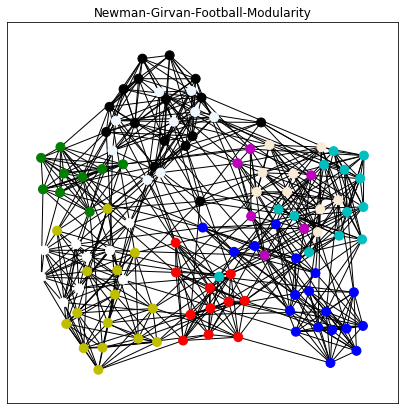

In [ ]:
visualization(football_conv, gir_foot_mod, "Newman-Girvan-Football-Modularity")

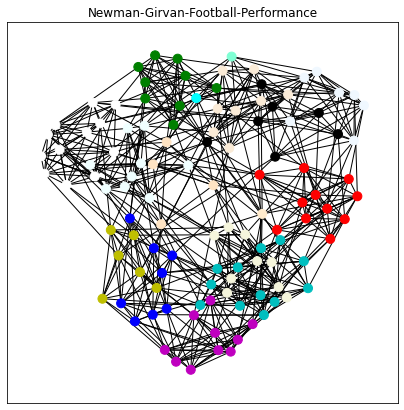

In [ ]:
visualization(football_conv, gir_foot_per, "Newman-Girvan-Football-Performance")

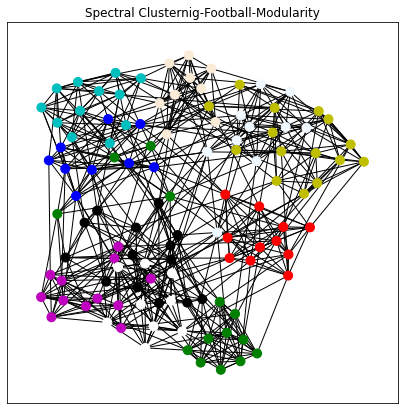

In [ ]:
visualization(football_conv, spect_foot_mod, "Spectral Clusternig-Football-Modularity")

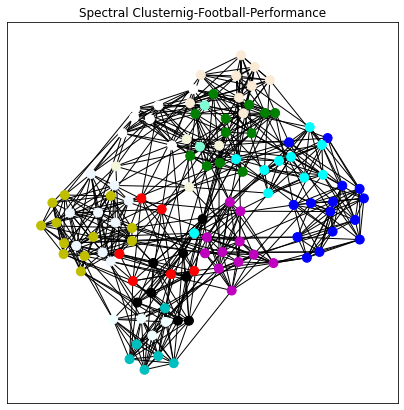

In [ ]:
visualization(football_conv, spect_foot_per, "Spectral Clusternig-Football-Performance")

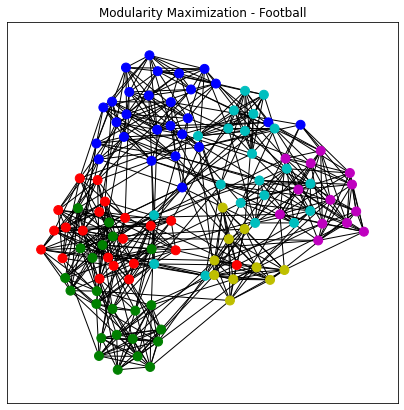

In [ ]:
visualization(football_conv, mod_foot, "Modularity Maximization - Football")

**Football**<br>
Όσον αφορά το **modularity**, στους αλγορίθμους newman girvan και spectral clustering έχουμε τα ίδια αριθμητικά αποτελέσματα, αλλά και παρόμοια οπτικά. Ωστόσο, το καλύτερο αποτέλεσμα το είχαμε με τον modularity_maximization όπου είχαμε και λιγότερες κοινότητες (6 αντί για 10 όπως στους άλλους), οι οποίες είναι και πιο ευδιάκριτες. Τα αποτελέσματά του (59% και 67%) είναι από τα πιο μεγάλα σε σχέση με τους υπόλοιπους γράφους. Επομένως το football dataset είχε αρκετά καλά αποτελέσματα στον σχεδιασμό κοινοτήτων σε σχέση με τα αναμενόμενα.<br>
Όσον αφορά το **performance** με τους αλγορίθμους newman girvan και spectral clustering δημιουργήθηκαν περισσότερες κοινότητες και ήταν αρκτά υψηλό, με τον πρώτο αλγόριθμο να έχει λίγο καλύτερο αποτέλεσμα και με μεγαλύτερο αριθμό κοινοτήων. Οπτικά βέβαια οι κοινότητες είναι πιο "διάσπαρτες" και ο χρωματισμός τους είναι απαραίτητος για να διακριθούν. Τέλος, ο αλγόριθμος Modularity Maximization αν και δίνει λίγο πιο χαμηλό performance, οποτικοποιεί καλύτερα τις κοινότητες, αφού είναι πιο συγκενρωμένες σε μία περιοχή η κάθεμία. Παρ'όλα αυτά ο προσδιορισμός του αριθμού των ζευγών κόμβων που έχουν ερμηνευθεί ορθά είναι αυξημένος σε όλες τις μεθόδους.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

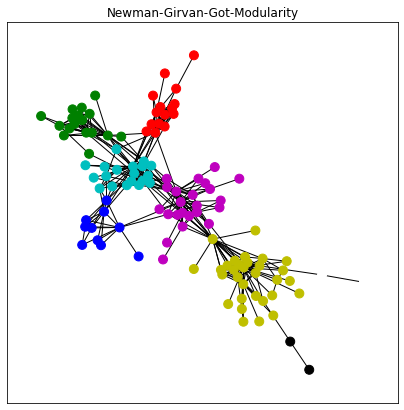

In [ ]:
visualization(got_conv, gir_got_mod, "Newman-Girvan-Got-Modularity")

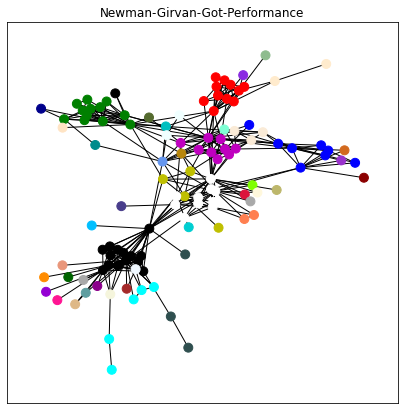

In [ ]:
visualization(got_conv, gir_got_per, "Newman-Girvan-Got-Performance")

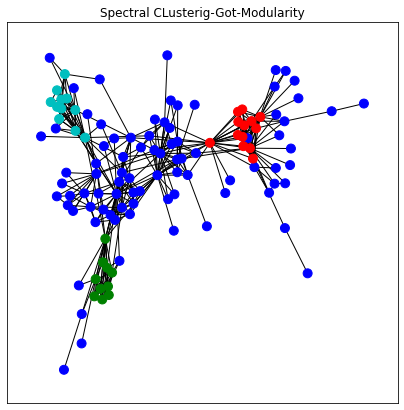

In [ ]:
visualization(got_conv, spect_got_mod, "Spectral CLusterig-Got-Modularity")

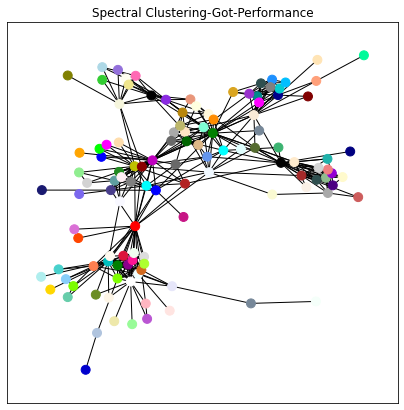

In [ ]:
visualization(got_conv, spect_got_per, "Spectral Clustering-Got-Performance")

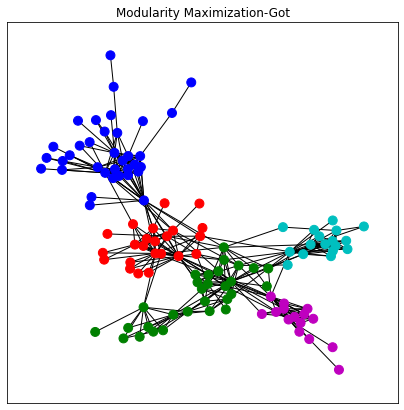

In [ ]:
visualization(got_conv, mod_got, "Modularity Maximization-Got")

**got** <br>
Όσον αφορά το **modularity**, έχουμε ένα σχετικά καλό αριθμητικό αποτέλεσμα με τους αλγορίθμους newman girvan και modularity_maximization, με τον πρώτο να δημιουργεί περισσότερες κοινότητες. Οπτικά οι κοινότητες είναι πλήρως ανεξάρτητες και στις δύο περιπτώσεις, με τον newman girvan να τις χωρίζει καλύτερα. Ο αλγόριθμος spectral clustering, από την άλλη έδωσε modularity ίσο με 0,44 κάτι το οποίο οπτικοποιείται και εδώ, αφού βλέπουμε ότι έχουμε μία πολύ μεγάλη κοινότητα που καλύπτει το μεγαλύτερο μέρος του γράφου και ακόμα άλλες 3 μικρές, κάτι το οποίο δεν είναι εύστοχο. <br>
Όσον αφορά το **performance**, το καλύτερο αποτέλεσμα το πήραμε με τον αλγόριθμο newman girvan και 50 κοινότητες. Ακολουθεί ο modularity_maximization και τέλος είναι ο spectral clustering με πολύ λίγες κοινότητες(4). Οπτικά μπορούμε να τις ξεχωρίσουμε ευδιάκριτα μόνο στον modularity_maximization, καθώς στους άλλους δύο έχουμε πάρα πολλές κοινότητες (50 και 40) και ουσιαστικά βλέπουμε διαφορετιά χρωματισμένους κόμβους. Κάτι τέτοιο θεωρούμε ότι οφείλεται στη χαμητλή συνεκτικότητα του γράφου.

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

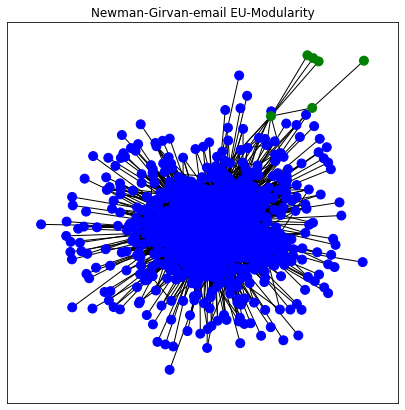

In [ ]:
visualization(email_conv, gir_eu_mod, "Newman-Girvan-email EU-Modularity")

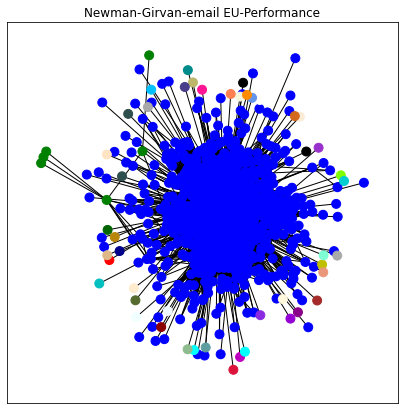

In [ ]:
visualization(email_conv, ger_eu_per, "Newman-Girvan-email EU-Performance")

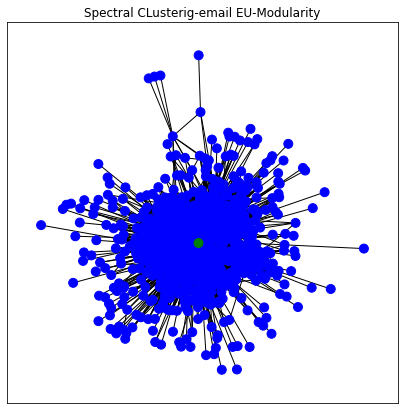

In [ ]:
visualization(email_conv, spect_eu_mod, "Spectral CLusterig-email EU-Modularity")

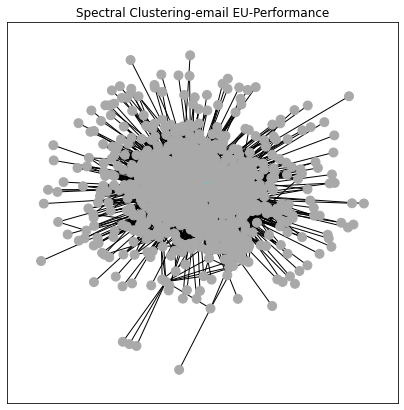

In [ ]:
visualization(email_conv, spect_eu_per, "Spectral Clustering-email EU-Performance")

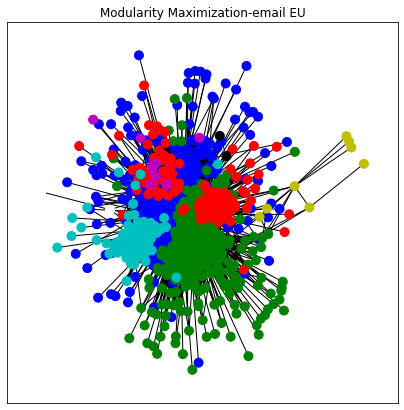

In [ ]:
visualization(email_conv, mod_eu, "Modularity Maximization-email EU")

**email EU** <br>
Όσον αφορά το **modularity**, αριθμητικά καλά αποτελέσματα έδωσε μόνο η μέθοδος modularity_maximization με 8 κοινότητες. Οι άλλες δύο μέθοδοι έδωσαν αποτελέσματα κοντά στο μηδέν. Οπτικά modularity_maximization κάνει διαχωρισμό σε κοινότητεςκαι βλέπουμε μία σχετική κατηγοριοποίηση, ενώ οι άλλες δυο μέθοδοι που είχαν ορίσει και δύο κοινότητες μόνο ουσιαστικά έχουν δημιουργήσει μία μόνο τεράστια κοινότητα και η δεύτερη αποτελέιται από πολύ λίγους κόμβους, κάτι το οποίο δεν είναι εύστοχο προφανώς.
Ακριβώς ίδια συμπεράσματα έχουμε και για το **performance**. <br>
Ένα τέτοιο αποτέλεσμα ήταν αναμενόμενο, καθώς η ανταλλαγή emails σε έχει οδηγήσει σε πολλές συνδέσεις μεταξύ των περισσότερων κόμβων.

#### Οπτικοποίηση κοινοτήτων REG

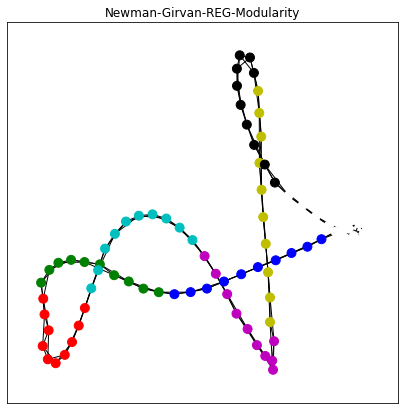

In [ ]:
visualization(REG, gir_reg_mod, "Newman-Girvan-REG-Modularity")

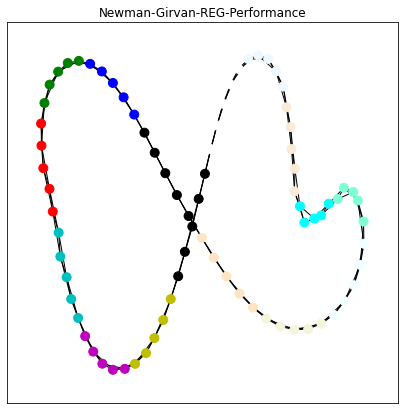

In [ ]:
visualization(REG, gir_reg_per, "Newman-Girvan-REG-Performance")

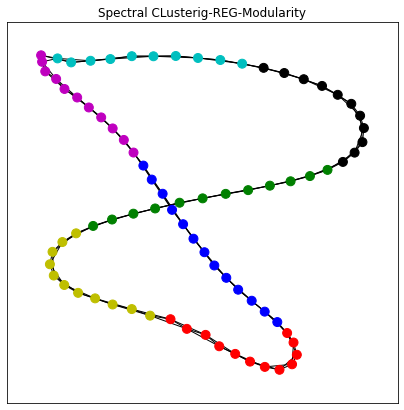

In [ ]:
visualization(REG, spect_reg_mod, "Spectral CLusterig-REG-Modularity")

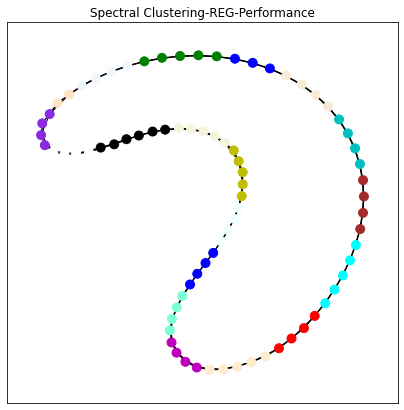

In [ ]:
visualization(REG, spect_reg_per, "Spectral Clustering-REG-Performance")

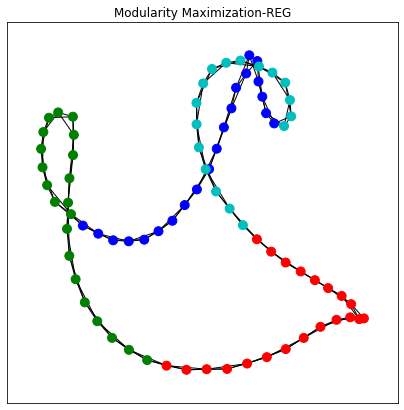

In [ ]:
visualization(REG, mod_reg, "Modularity Maximization-REG")

**REG**<br>

Όσον αφορά το **modularity**, οι αλγόριθμοι newman girvan και spectral clustering, δημιούργησαν 8 και 7 κοινότητες αντίστοιχα και έδωσαν έαν πολύ υψηλό ποσοστό (72%). Επομένως πέτυχαν σε μεγάλο ποσοστό σε σχέση με τους υπόλοιπους γράφουν την πιθανότητα να σχηματιστεί μία ακμή μεταξύ δύο κόμβων. Ο modularity_maximization αλγόριθμος έδωσε λίγο χειρότερα αποτελέσματα λόγω της δημιουργίας του δενδρογράμματος από κάτω προς τα πάνω. <br>
Όσον αφορά το **performance**, έχουμε τα ίδια αριθμητικά συμπεράσματα με τη διαφορά ότι οι δύο πρώτοι αλγόριθμοι δημιούργησαν περισσότερες κοινότητες.<br>
Οπτικά όλες οι κοινότητες είναι ευδιάκριτες. Τα πάνω αποτελέσματα είναι τα υψηλότερα και αυτό οφείλεται στην σταθερή διάταξη και γεωγραφία του γραφήματός.

#### Οπτικοποίηση κοινοτήτων RGER

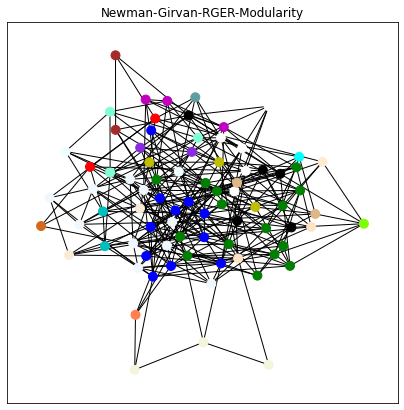

In [ ]:
visualization(RGER, gir_rger_mod, "Newman-Girvan-RGER-Modularity")

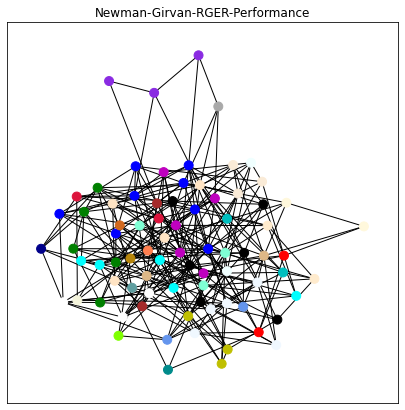

In [ ]:
visualization(RGER, gir_rger_per, "Newman-Girvan-RGER-Performance")

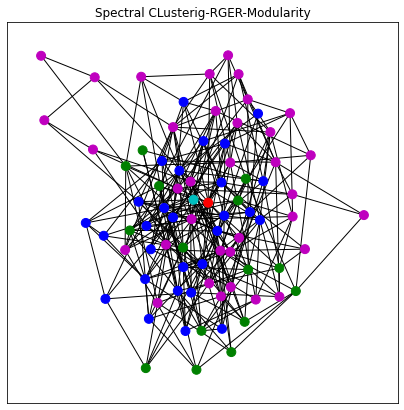

In [ ]:
visualization(RGER, spect_rger_mod, "Spectral CLusterig-RGER-Modularity")

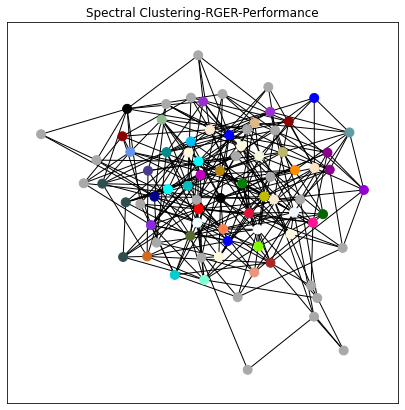

In [ ]:
visualization(RGER, spect_rger_per, "Spectral Clustering-RGER-Performance")

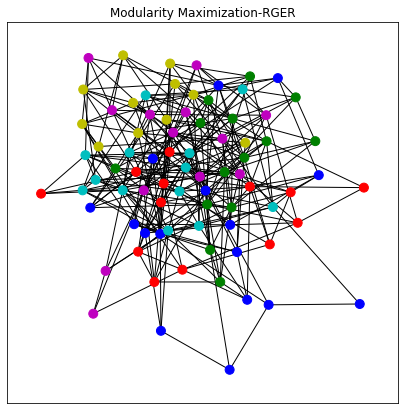

In [ ]:
visualization(RGER, mod_rger, "Modularity Maximization-RGER")

**RGER**<br>

Όσον αφορά το **modularity** σε όλες τις περιπτώσεις ήταν αρκετά χαμηλό. Ο αλγόριθμος spectral clustering είχε το χαμηλότερο αποτέλεσμα με 5 κοινότητες, ενώ ο modularity_maximization το μεγαλύτερο με 6 κοινότητες. Ωστόσο σε καμία περίτπωση δεν μπορούμε να διακρίνουμε κοινότητες στον γράφο. Αυτό συμβαίνει, διότι οι συνδέσεις των κόμβων γίνεται με τυχαίο τρόπο,κι έτσι η πιθανότητα να βρεθούν (διακριτές) κοινότητες είναι πολύ μιρκή. <br>

Όσον αφορά το **performance** ο newman girvan δίνει καλύτερα αποτελέσματα για 33 κοινότητες, ακολουθεί ο modularity_maximization για 6 και τέλος είναι ο spectral clusterig για 5. Βέβαια και τα τρία αποτελέσματα είναι αρκετά υψηλά. Κι εδώ οι οπτικοποιημένες κοινότητες είναι αρκετά διάσπαρτες στον γράφο. 



#### Οπτικοποίηση κοινοτήτων RGG

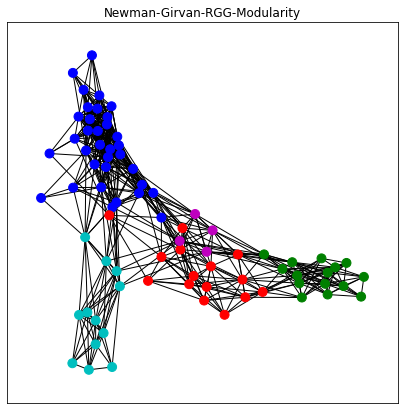

In [ ]:
visualization(RGG, gir_rgg_mod, "Newman-Girvan-RGG-Modularity")

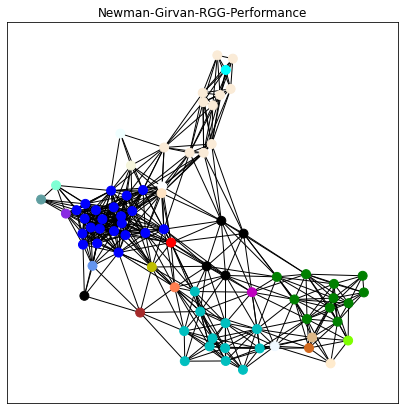

In [ ]:
visualization(RGG, gir_rgg_per, "Newman-Girvan-RGG-Performance")

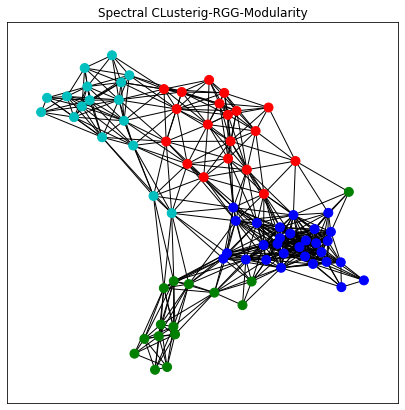

In [ ]:
visualization(RGG, spect_rgg_mod, "Spectral CLusterig-RGG-Modularity")

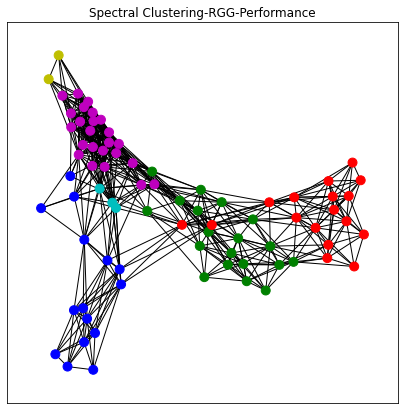

In [ ]:
visualization(RGG, spect_rgg_per, "Spectral Clustering-RGG-Performance")

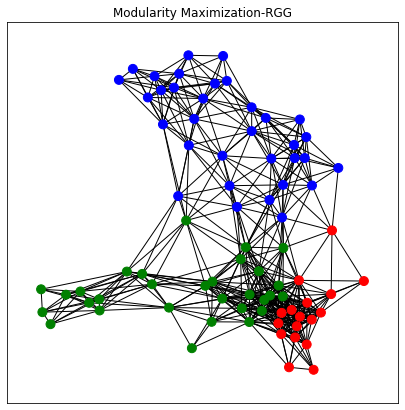

In [ ]:
visualization(RGG, mod_rgg, "Modularity Maximization-RGG")

Όσον αφορά το **modularity** ο spectral clustering έδωσε το υψηλότερο αποτέλεσμα με 4 κοινότητες, ενώ τα υπόλοιπα δεν απείχαν πολύ. Τα αποτελέσματα είναι αρκετά ευδιάκριτα σε όλες τις περιπτώσεις.<br>

Όσον αφορά το **performance**, έχουμε πολύ καλό αποτέλεσμα(90%) για τον πρώτο αλγόριθμο με 26 κοινότητες, μετά είναι ο δεύτερος (87%) με 6 κοινότηττες και τέλος είναι ο τρίτος (75%) με 3 κοινότητες. Ωστόσο ο spectral clustering φαίνεται να ομαδοποιεί καλύτερα τους κόμβους.

Όπως φαίνεται υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. 

#### Οπτικοποίηση κοινοτήτων SW

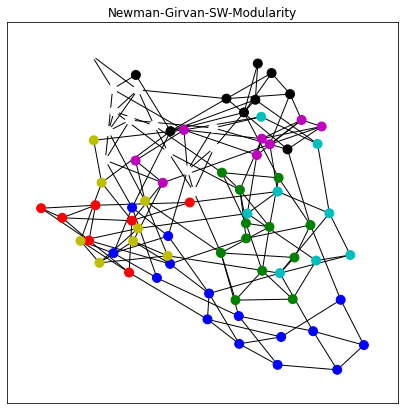

In [ ]:
visualization(SW, gir_sw_mod, "Newman-Girvan-SW-Modularity")

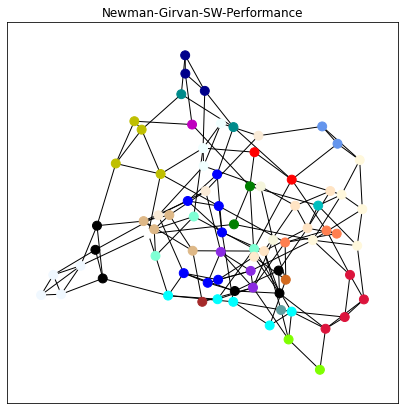

In [ ]:
visualization(SW, gir_sw_per, "Newman-Girvan-SW-Performance")

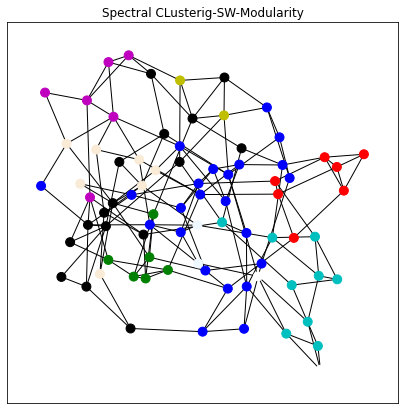

In [ ]:
visualization(SW, spect_sw_mod, "Spectral CLusterig-SW-Modularity")

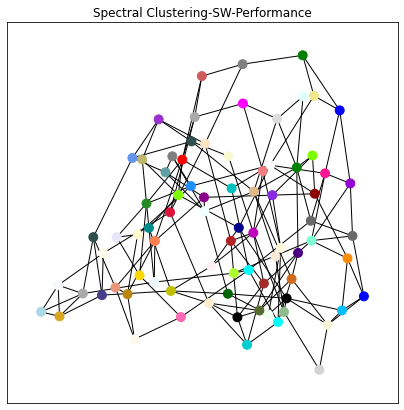

In [ ]:
visualization(SW, spect_sw_per, "Spectral Clustering-SW-Performance")

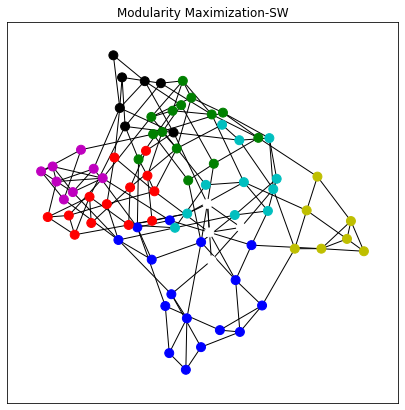

In [ ]:
visualization(SW, mod_sw, "Modularity Maximization-SW")

Όσον αφορά το **modularity** ο newman girvan έδωσε το υψηλότερο αποτέλεσμα(57%) με 8 κοινότητες. Ο modulariry_maximization έδωσε ένα πολύ κοντινό αποτέλεσμα (56%) με 8 κοινότητες. Από την άλλη, ο spectral clustering έδωσε 35% με 10 κοινότητες κάτι το οποίο δεν θεωρείται καλό αποτέλεσμα. Όπως φαίνεται υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. <br>

Όσον αφορά το **performance**, έχουμε πολύ καλό αποτέλεσμα(96%) για τον πρώτο αλγόριθμο με 31 κοινότητες, μετά είναι ο δεύτερος (92%) με 24 κοινότητες και τέλος είναι ο τρίτος (88%) με 8 κοινότητες. Βλέπουμε λοιπόν ότι ο μεγάλος αριθμός κοινοτήτων είναι αυτός που αυξάνει το performance.



#### Οπτικοποίηση κοινοτήτων SF

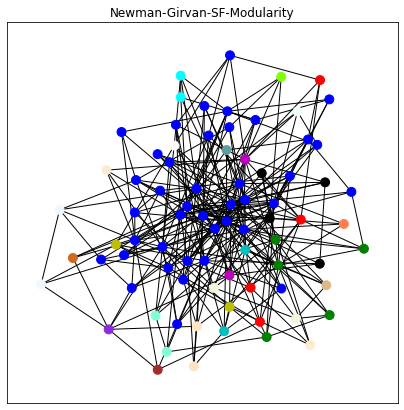

In [ ]:
visualization(SF, gir_sf_mod, "Newman-Girvan-SF-Modularity")

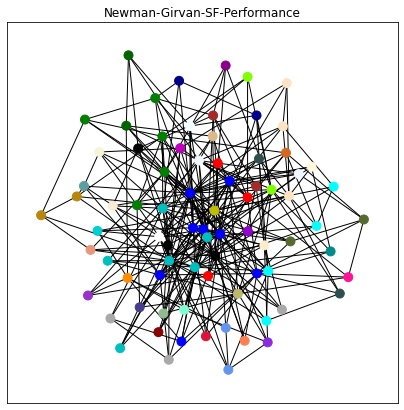

In [ ]:
visualization(SF, gir_sf_per, "Newman-Girvan-SF-Performance")

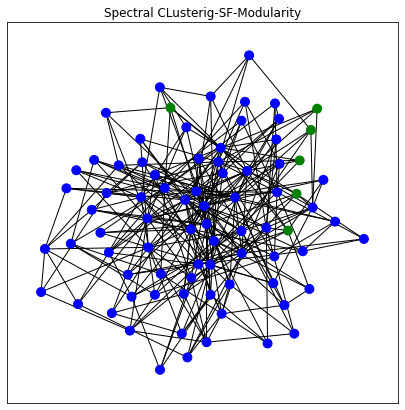

In [ ]:
visualization(SF, spect_sf_mod, "Spectral CLusterig-SF-Modularity")

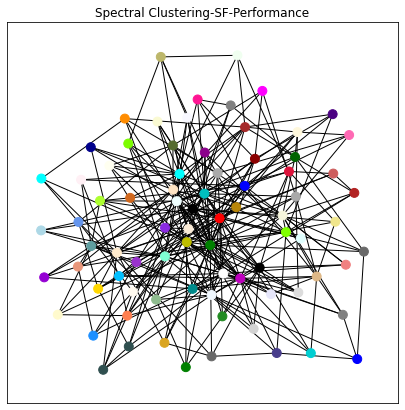

In [ ]:
visualization(SF, spect_sf_per, "Spectral Clustering-SF-Performance")

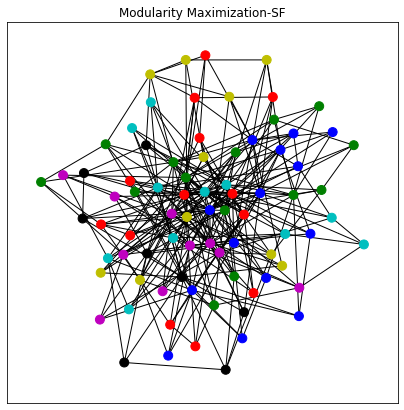

In [ ]:
visualization(SF, mod_sf, "Modularity Maximization-SF")

Σε ένα scale-free δίκτυο αναμένουμε οι κοινότητες να σχηματίζονται γύρω από  κόμβους με μεγάλο βαθμό. 

Όσον αφορά το **modularity** και στις τρεις περιπτώσεις έχουμε πολύ άσχημα αποτελέσματα. Μάλιστα ο αλγόριθμος spectral clustering έδωσε αρνητική τιμή, που σημαίνει ότι είχαμε λιγότερες δημιουργίες ακμών μεταξύ κόμβων από τις αναμενόμενες. <br>

Όσον αφορά το **performance**, έχουμε πολύ καλό αποτέλεσμα(91%) για τον πρώτο αλγόριθμο με 49 κοινότητες, μετά είναι ο δεύτερος (85%) με 2 κοινότητες και τέλος είναι ο τρίτος (84%) με 7 κοινότητες.

Οπτικά τα αποτελέσματα δεν είναι εύκολο να παρατηρηθούν και να εξάγουμε συμπεράσματα, ακτός απο την περίπτωση του modularity με την spectral clustering μέθοδο που ουσιαστικά έχουμε μία πολύ μεγάλη κοινότητα και μία άλλη με πολύ λίγους κόμβους.

### Σύγκριση με ground-truth διαμέριση

Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, θα συγκρίνουμε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity.

In [14]:
# create a list of lists for the communities
communities_eu = []
for i in range(42):
    # In each iteration, add an empty list to the main list
    communities_eu.append([])

# insert the data
with open('email-Eu-core-department-labels.txt') as f:
    lines = f.readlines()
    nodes = [line.split()[0] for line in lines]
    com = [line.split()[1] for line in lines]


# convert lists of strings to lists of ints
nodes_map = map(int, nodes)
nodes_int = list(nodes_map)
com_map = map(int, com)
com_int = list(com_map)
email_list = list(email.nodes)
email_list_map = map(int,email_list)
email_list_int = list(email_list_map)

# create new lists for final results
final_nodes = []
final_community = []
temp = 0
# we keep the nodes of the biggest component of the email EU network
for i in range(len(nodes_int)):
  if nodes_int[i] in email_list_int:
    final_nodes.append(temp)
    temp+=1
    final_community.append(com_int[i])

In [15]:
# categorize data
for i in range(986):
   x = final_community[i]
   communities_eu[x].append(final_nodes[i])

In [ ]:
# email-Eu-core-department-labels.txt compare

email_labels_mod = nx.algorithms.community.quality.modularity(email_conv,communities_eu)
email_labels_per = np.array(nx.algorithms.community.quality.partition_quality(email_conv, communities_eu))

print("email EU" ,len(communities_eu),"communities:")
print(" ")
print("modularity = ", email_labels_mod)
print("performance = ", email_labels_per[1])
print(" ")


email EU 42 communities:
 
modularity =  0.2880131886237422
performance =  0.9428136036490563
 


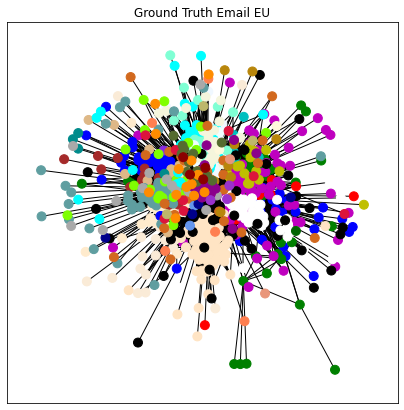

In [17]:
visualization(email_conv, communities_eu, "Ground Truth Email EU")

Παρατηρούμε ότι το αποτέλεσμα που έχουμε με την ground truth διαμέρηση όσον αφορά το **modularity** δεν είναι το βέλτιστο, καθώς η μάθοδος modularity_maximization έδωσε καλύτερο(0.28). Ωστόσο είναι πολύ καλύτερο από τις δύο άλλες μεθόδους που έδωσαν αποτελέσματα κοντά στο μηδέν. Όσον αφορά το **performance**, από την άλλη η ground truth διαμέρηση έδωσε πολύ βελτιωμένο αποτέλεσμα, καθώς το καλύτερο που είχαμε ήταν το 0.75 με το modularity_maximization, ενώ οι άλλοι δύο αλγόριθμοι είχαν δώσει ξανά πολύ χαμηλά αποτελέσματα.

Φυσικά θεωρούμε ότι καλύτερο αποτέλεσμα δίνει η ground truth διαμέρηση αφού έχει πολύ καλά αποτελέσματα και δημιουργεί πολύ περισσότερες κοινότητες(42), σε σχέση με τις 2 και 8 που είχαν ως αποτέλεσμα οι παραπάνω αλγόριμθοι. Επιπλέον η οποτικοποίηση της δείχνει πολύ πιο ξεκάθαρο διαχωρισμό σε κοινότητες, απ'ότι είχαμε στους παραπάνω αλγορίθμους.